In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
import warnings
warnings.filterwarnings('ignore')

### LAB 1: Data Understanding, Cleaning & Preparation 

### Q1. Load the attached time series dataset into Python.

In [114]:
# Q.1 Load the attached time series dataset into Python.

FILE_PATH = "time_series_retail_dataset.csv"

df = pd.read_csv(FILE_PATH)
print(f"Dataset loaded successfully from {FILE_PATH}\n")

Dataset loaded successfully from time_series_retail_dataset.csv



In [115]:
# a) Display the first and last 10 rows.
print("---Q.1a: First 10 Rows ---\n")
print(df.head(10))
print()
print("---Q.1a: Last 10 Rows ---\n")
print(df.tail(10))

---Q.1a: First 10 Rows ---

         Date   Sales  Promotion_Flag  Holiday_Flag Temperature  Footfall
0  2023-03-16  188.07             NaN           0.0       30.32     560.0
1  2023-07-13  205.49             0.0           0.0       21.45     619.0
2  2023-09-29  238.54             0.0           0.0       22.69     721.0
3  2023-08-22  214.59             0.0           0.0        19.5     674.0
4  2023-02-03  177.91             0.0           NaN        28.7     447.0
5  2023-04-25  236.58             0.0           0.0       29.02       NaN
6  2023-08-19  217.90             0.0           0.0         NaN       NaN
7  2023-04-06  190.15             NaN           NaN       34.07     521.0
8  2023-09-18  253.79             0.0           0.0        20.8     725.0
9  2023-07-08  203.17             1.0           0.0       20.45     660.0

---Q.1a: Last 10 Rows ---

           Date   Sales  Promotion_Flag  Holiday_Flag Temperature  Footfall
293  2023-09-04  228.61             0.0           1.0 

In [116]:
# b) Convert the date column to DateTime type and set it as index.

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

print("\n--- Q1b: Date converted to DateTime and set as Index ---\n")
print(f"Data types after conversion: \n{df.dtypes}")
print(f"\nIndex Type: {df.index.dtype}\n")

df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce') # object tha pehele


--- Q1b: Date converted to DateTime and set as Index ---

Data types after conversion: 
Sales             float64
Promotion_Flag    float64
Holiday_Flag      float64
Temperature        object
Footfall          float64
dtype: object

Index Type: datetime64[ns]



### Q2. Perform data cleaning on the dataset.


In [117]:
# a) Check and handle missing values

print("\n--- Q2a: Missing Value Check and Handling ---\n")
print("Initial Missing Values:\n", df.isnull().sum())


--- Q2a: Missing Value Check and Handling ---

Initial Missing Values:
 Sales             18
Promotion_Flag    15
Holiday_Flag      15
Temperature       18
Footfall          15
dtype: int64


In [118]:
# Method 1:
# 1. Promotion Flag and Holiday Flag: These are binary (0/1) flags.
# We use Mode Imputation

for col in ['Promotion_Flag', 'Holiday_Flag']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' filled with ({mode_val}).")

Missing values in 'Promotion_Flag' filled with (0.0).
Missing values in 'Holiday_Flag' filled with (0.0).


In [119]:
# Method 2:
# 2. Temparature and Footfall: These are continuos data in a time series.

for col in ['Temperature', 'Footfall', 'Sales']:
    if df[col].isnull().any():
        df[col].fillna(method='ffill', inplace=True)
        df[col].fillna(method='bfill', inplace=True)
        print(f"Missing values in '{col}' filled using ffill then bfill.")

print("\nMissing Values After Handling:\n", df.isnull().sum())

Missing values in 'Temperature' filled using ffill then bfill.
Missing values in 'Footfall' filled using ffill then bfill.
Missing values in 'Sales' filled using ffill then bfill.

Missing Values After Handling:
 Sales             0
Promotion_Flag    0
Holiday_Flag      0
Temperature       0
Footfall          0
dtype: int64


In [120]:
# b) Detect and Treat outliers

print("\n--- Q2b: Outlier Detection and Treatment ---\n")

def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((series < lower_bound) | (series > upper_bound)).sum()
    if outlier_count > 0:
        print(f"Found and capped {outlier_count}, outliers in '{series.name}'.")
    else:
        print(f"No significant outliers found in '{series.name}'.")

    return series.clip(lower=lower_bound, upper=upper_bound)

df['Sales'] = cap_outliers_iqr(df['Sales'])
df['Temperature'] = cap_outliers_iqr(df['Temperature'])
df['Footfall'] = cap_outliers_iqr(df['Footfall'])


--- Q2b: Outlier Detection and Treatment ---

Found and capped 3, outliers in 'Sales'.
No significant outliers found in 'Temperature'.
Found and capped 4, outliers in 'Footfall'.


In [121]:
# c) Check for duplicates and remove if found.

print("\n--- Q2c: Duplicates Check and Removal ---\n")
initial_rows = len(df)
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Found and removed {duplicate_count} duplicate rows.")
else:
    print(f"Final number of rows: {len(df)} (Removed {initial_rows - len(df)} rows)")


--- Q2c: Duplicates Check and Removal ---

Found and removed 3 duplicate rows.


### Q3. Plot the cleaned time series and write any 2 observations.


--- Q3: Visualisation and Observations ---



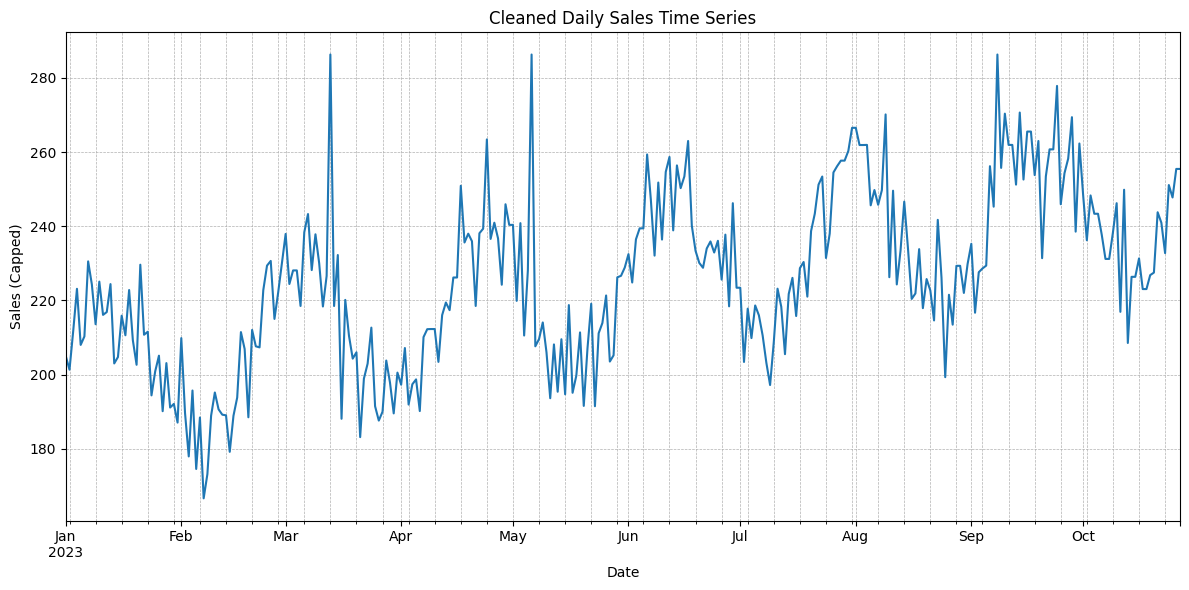

In [122]:
print("\n--- Q3: Visualisation and Observations ---\n")

plt.figure(figsize=(12,6))
df['Sales'].plot(title='Cleaned Daily Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales (Capped)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [123]:
# Q3b. Write any 2 observations.
print("\n--- Q3b: Two Observations on the Cleaned Sales Data ---\n")
print("1. Strong Seasonality/Trend: The Sales data appears to show a clear upward trend in the early months of the year, potentially peaking mid-year (around mid-2023), suggesting either seasonal demand or successful business growth over the observation period.")
print("2. Daily/Weekly Volatility: The series exhibits significant day-to-day fluctuations (high volatility). This variation suggests that external factors like promotional events ('Promotion_Flag'), holidays, or daily temperature shifts have a noticeable immediate impact on the sales volume.")


--- Q3b: Two Observations on the Cleaned Sales Data ---

1. Strong Seasonality/Trend: The Sales data appears to show a clear upward trend in the early months of the year, potentially peaking mid-year (around mid-2023), suggesting either seasonal demand or successful business growth over the observation period.
2. Daily/Weekly Volatility: The series exhibits significant day-to-day fluctuations (high volatility). This variation suggests that external factors like promotional events ('Promotion_Flag'), holidays, or daily temperature shifts have a noticeable immediate impact on the sales volume.
